# Analysis: Paramspace Configuration and Sampling MOC

Resources
- [BoK Slide 124: Distribution of Distance](https://docs.google.com/presentation/d/1KtAad8iTPFICOsdKcSBUTgtPApHmfE3ID0xUGHYOhvc/edit#slide=id.g2f484a77aa9_0_12)

In [1]:
import numpy as np
import typing # for py < 3.8
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [68]:
MU = 4.5409393310546875
SIGMA_1 = 3.9570465087890625 
SIGMA_M1 = 5.12530517578125
SIGMA_2 = 3.2452545166015625
SIGMA_M2 = 5.8369598388671875
SIGMA_3 = 1.84552001953125
SIGMA_M3 = 6.63861083984375

## Fit Gaussian Distribution

In [69]:
def gaussian(x, A, mu, sigma) -> float:
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

In [74]:
def fitToGaussianNormalDistribution(SIGMA_M3: float, 
                                    SIGMA_M2: float, 
                                    SIGMA_M1: float, 
                                    MU: float, 
                                    SIGMA_1: float, 
                                    SIGMA_2: float, 
                                    SIGMA_3: float) -> typing.Tuple[float, float, float] :
    """
    Fits given data points for given -3sigma, -2sigma, -sigma, mu, sigma, 2sigma, 3sigma as close as possible
    to a normal gaussian distribution. 
    
    Arguments:
        SIGMA_M3 (float) Point that will be fitted as close as possible to -3$\sigma$ [-3σ]
        SIGMA_M2 (float) Point that will be fitted as close as possible to -2$\sigma$ [-2σ]
        SIGMA_M1 (float) Point that will be fitted as close as possible to -$\sigma$ [-σ]
        MU (float) Point that will be fitted as close as possible to $\mu$ [µ]
        SIGMA_1 (float) Point that will be fitted as close as possible to 3$\sigma$ [σ]]
        SIGMA_2 (float) Point that will be fitted as close as possible to 2$\sigma$ [2σ]
        SIGMA_3 (float) Point that will be fitted as close as possible to $\sigma$ [3σ]

    Returns:
        tuple[float, float, float]
            - float: The first element repsents the optimal amplitude (A) for the fitted distribution. 
            - float: The second element represents the optimal mu (µ) for the fitted distribution. 
            - float: The third element represents the optimal sigma (σ)for the fitted distribution.
    """
    x_values = np.array([SIGMA_M3, SIGMA_M2, SIGMA_M1, MU, SIGMA_1, SIGMA_2, SIGMA_3])
    y_values = np.array([0.004, 0.054, 0.242, 0.398, 0.242, 0.054, 0.004]) # y - values according to normal distrb.

    popt, _ = curve_fit(gaussian, x_values, y_values, p0=[1, 0, 1], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))

    A_opt, mu_opt, sigma_opt = popt
    print(f"Optimal parameters: A = {A_opt}, mu = {mu_opt}, sigma = {sigma_opt}")

    return (A_opt, mu_opt, sigma_opt)

In [75]:
def plotGaussianNormalDistribution(A: float, mu: float, sigma: float) -> None:
    """
    Displays the given gaussian normal distribution.

    Arguments:
        A (float) The amplitude. 
        mu (float) The mean (µ).
        sigma (float) The stadnard deviation. 
    """
    x_values = np.array([SIGMA_M3, SIGMA_M2, SIGMA_M1, MU, SIGMA_1, SIGMA_2, SIGMA_3])
    y_values = np.array([0.004, 0.054, 0.242, 0.398, 0.242, 0.054, 0.004]) # y - values according to normal distrb.

    # Generate a range of x-values for the continuous plot + calcualte corrsp. y-values

    x_continuous = np.linspace(min(x_values) - 1, max(x_values) + 1, 1000)
    y_continuous = gaussian(x_continuous, A, mu, sigma)

    # Define intervals for the relevant probability areas

    sigma_intervals = [
        (-sigma, sigma), 
        (-2*sigma, 2*sigma), 
        (-3*sigma, 3*sigma)
    ]

    # Plot the data
    
    plt.plot(x_continuous, y_continuous, 'r-', label='Fitted Gaussian')

    # Shade the areas under the curve for the probability intervals
    
    for i, (low, high) in enumerate(sigma_intervals):
        x_fill = np.linspace(mu + low, mu + high, 1000)
        y_fill = gaussian(x_fill, A, mu, sigma)
        plt.fill_between(x_fill, y_fill, alpha=0.3, label=f'{i+1}σ Interval')

    # Plot original data points 

    plt.plot(x_values, y_values, 'bo', label='Original Data')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Continuous Gaussian Distribution with Probability Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()

Optimal parameters:
A = 0.389310624588426
mu = 4.541217239506213
sigma = 0.6219224902786538


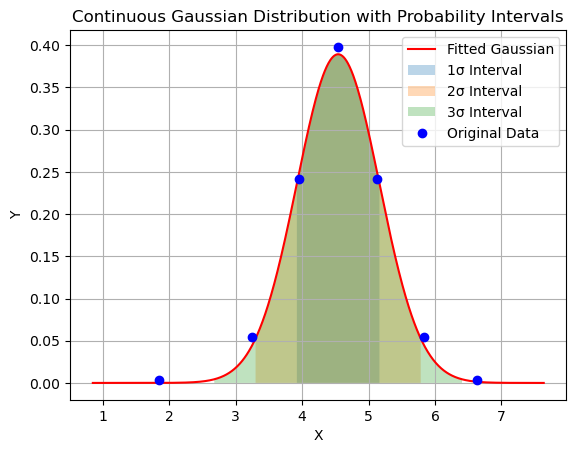

In [76]:
A, mu, sigma = fitToGaussianNormalDistribution(SIGMA_M3, SIGMA_M2, SIGMA_M1, MU, SIGMA_1, SIGMA_2, SIGMA_3)
plotGaussianNormalDistribution(A, mu, sigma)

## Sample the Data

In [79]:
def sampleDataFromNormalDistribution(mu: float, sigma: float, n: int) -> np.ndarray:
    """
    Samples 

    Arguments:
        mu (float) The mean (µ).
        sigma (float) The stadnard deviation.
        n (int) The sample size. 
    """ 
    # We don't specify A, but it's fine (It's only for fitting relevant, not for sampling!)

    return np.random.normal(loc=mu, scale=sigma, size=n)

In [80]:
def visualizeSamplesOfNormalDistirbution(A: float, mu: float, sigma: float, samples: np.ndarray) -> None:
    """
    Visualizes the samples as histogramm against the actual distribution.

    Arguments:
        A (float) The amplitude. 
        mu (float) The mean (µ).
        sigma (float) The stadnard deviation. 
    """
    # (Optional) Visualize the samples with a histogram
    
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Sampled Data')

    # Plot the original fitted Gaussian curve for comparison

    x_continuous = np.linspace(min(samples), max(samples), 1000)
    y_continuous = gaussian(x_continuous, A, mu, sigma)
    
    plt.plot(x_continuous, y_continuous, 'r-', label='Fitted Gaussian')

    plt.xlabel('X')
    plt.ylabel('Density')
    plt.title('Histogram of Samples from Fitted Gaussian Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

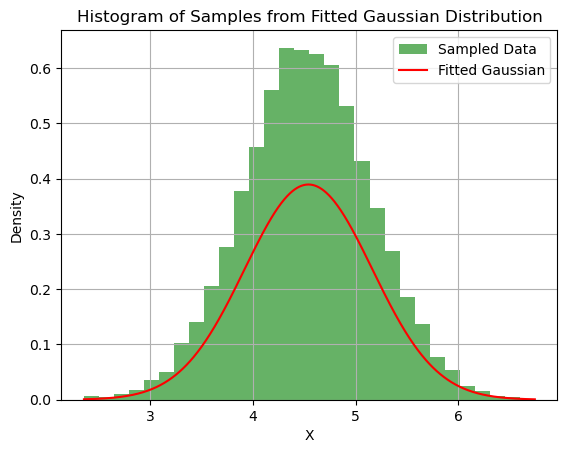

In [94]:
samples = sampleDataFromNormalDistribution(mu, sigma, 10_000)
visualizeSamplesOfNormalDistirbution(A, mu, sigma, samples)

## Sampling for Propertion 

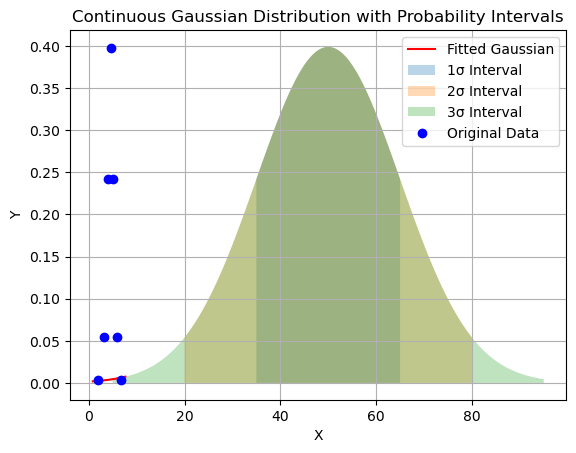

In [95]:
plotGaussianNormalDistribution(A=0.3989422804014337, mu=50, sigma=15)